<a href="https://colab.research.google.com/github/HannaPo/ML-zoomcamp/blob/master/04_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [3]:
!wget $data

/bin/bash: -c: line 2: syntax error near unexpected token `('
/bin/bash: -c: line 2: `0          BMW  1 Series M  2011     premium unleaded (required)      335.0   '


In [4]:
data.shape

(11914, 16)

In [5]:
features = [
    'Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP'
]

In [6]:
data = data[features]

In [7]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11845 non-null  float64
 4   engine_cylinders   11884 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   msrp               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [9]:
data['engine_hp'] = data['engine_hp'].fillna(0)
data['engine_cylinders'] = data['engine_cylinders'].fillna(0)

<ipython-input-9-55f2340080d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine_hp'] = data['engine_hp'].fillna(0)
<ipython-input-9-55f2340080d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['engine_cylinders'] = data['engine_cylinders'].fillna(0)


In [10]:
data.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [11]:
data['msrp'].mean()

40594.737032063116

In [12]:
categorical_columns = list(data.dtypes[data.dtypes == 'object'].index)
for c in categorical_columns:
    data[c] = data[c].str.lower().str.replace(' ', '_')
data.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500


In [13]:
data_class = data.copy()
mean = data_class['msrp'].mean()

data_class['above_average'] = np.where(data_class['msrp']>=mean,1,0)
data_class = data_class.drop(['msrp'], axis=1)
# data_class

In [14]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [17]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [18]:
data_class

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,1


**Question 1: ROC AUC feature importance**

In [19]:
num_test = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
for c in num_test:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

engine_hp, 0.917
engine_cylinders, 0.766
highway_mpg, 0.633
 city_mpg, 0.673


**Answer for Question 1:** engine_hp

**Question 2: Training the model**

In [20]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style', ]
numerical = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'year']

In [21]:
columns = categorical + numerical

In [22]:
dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val[columns].to_dict(orient='records')
X = dv.transform(val_dicts)

y_pred = model.predict_proba(X)[:, 1]

In [23]:
auc = roc_auc_score(y_val, y_pred).round(3)
auc

0.977

**Answer for Question 2:** 0.979

**Question 3: Precision and Recall**

In [24]:
def confusion_matrix_metrics(y_val, y_pred):

  scores = []

  thresholds = np.linspace(0, 1, 101)

  for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

  columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
  df_scores = pd.DataFrame(scores, columns=columns)
  return df_scores

df_scores = confusion_matrix_metrics(y_val, y_pred)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,643,345,11,1384
20,0.2,622,218,32,1511
30,0.3,606,159,48,1570
40,0.4,588,109,66,1620
50,0.5,567,76,87,1653
60,0.6,522,49,132,1680
70,0.7,490,36,164,1693
80,0.8,440,17,214,1712
90,0.9,347,4,307,1725


Intersection Threshold: 0.48


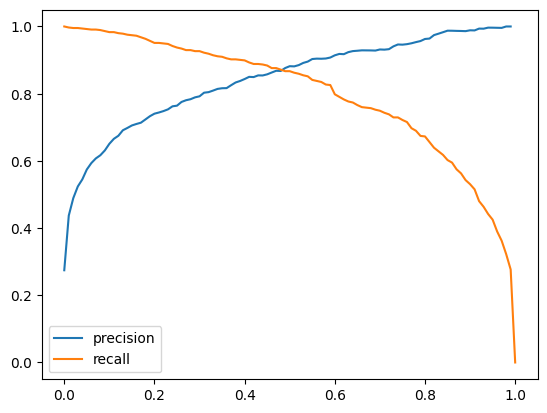

In [25]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

plt.plot(df_scores.threshold, df_scores['precision'], label='precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='recall')
plt.legend()
intersection_threshold = df_scores.iloc[(df_scores['precision'] - df_scores['recall']).abs().argsort()[:1]]['threshold'].values[0]
print("Intersection Threshold:", intersection_threshold)

**Answer for Question 3:** 0.48

**Question 4:** F1 score

In [26]:
df_scores['f1'] = 2 *( df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall))

In [27]:
max_f1_row = df_scores[df_scores['f1'] == df_scores['f1'].max()]
max_f1_threshold = max_f1_row['threshold'].values[0]
max_f1_score = max_f1_row['f1'].values[0]

print("Max F1 Score:", max_f1_score)
print("Threshold at Max F1 Score:", max_f1_threshold)

Max F1 Score: 0.8743253662297611
Threshold at Max F1 Score: 0.5


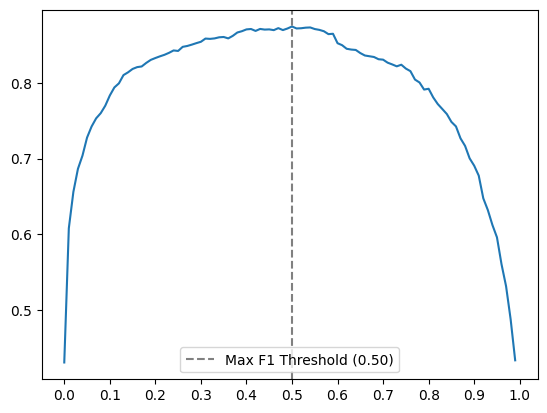

In [28]:
plt.plot(df_scores.threshold, df_scores.f1)
plt.xticks(np.linspace(0, 1, 11))


plt.axvline(x=max_f1_threshold, color='grey', linestyle='--', label=f'Max F1 Threshold ({max_f1_threshold:.2f})')

plt.legend()
plt.show()

**Question 5**

In [48]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [49]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.980 +- 0.002


**Question 6: Hyperparemeter Tuning**

In [55]:
from tqdm.auto import tqdm

In [57]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in tqdm([0.01, 0.1, 0.5, 10]):

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average.values
        y_val = df_val.above_average.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.4f +- %.4f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01 0.9516 +- 0.0025
C=0.1 0.9718 +- 0.0016
C=0.5 0.9799 +- 0.0033
C=10 0.9813 +- 0.0026


**Answer for Question 6:** 10